# 4.1 Logistic Regression

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com

Consider two populations $\Omega_1$, $\Omega_2$ with their random vectors of features associated $\mathbf{x_1},\mathbf{x_2} \in \mathbb{R}^p$, a discriminant is a function $D:\mathbb{R}^p \rightarrow \mathbb{R}$ such that if $D(\mathbf{x}) \geq t$ for some threshold $t \in \mathbb{R}$ then asign $\mathbf{x}$ to $\Omega_1$ otherwise $\mathbf{x}$ to $\Omega_2$. D its a linear discriminant if D has the form:

$$D(\mathbf{x})=\beta_0+\beta_1 x_1 + \dots + \beta_p x_p = \beta_0+\mathbf{x' \beta}$$

Here there is the assumption that there is a kind of imaginary boundary that "separates" the space into a linear way.

### Logistic Model
___

Consider the following random vector $(Y,X_1,\dots,Y_p) \in {0,1} \times \mathbb{R}^p$, where $Y$ is and indicator variable and this take the value 1 if the random vector belong to the population $\Omega_1$ and 0 if it belongs to $\Omega_2$, so it make sense that the probability of belonging to $\Omega_1$ (objetive population) sould be parametrized by a discriminant D, where D its a linear combination of features and weights:

$$P[Y=Y|X_1=x_1,\dots,X_p=x_p]=p(D)=p(\mathbf{x};\beta_0,\mathbf{\beta})$$

The logistic model establishes that the increase in the probability of belonging to the population $\Omega_1$ with respect to discriminant D is directly proportional to the probability of belonging to $\Omega_1$ given D and decreases as it approach to 1. 

$$ \frac{p'}{p}=1-p$$

Tha idea its try to solve this differential equation in order to put $p$ as function of the values of D.

$$
\begin{align*}
\frac{p'}{p} &= 1-p\\
p' &= p(1-p)\\
\frac{dp}{dD} &= p(1-p)\\
\frac{dp}{p(1-p)}&=dD\\
\int \frac{dp}{p(1-p)}&=\int dD\\
\int \frac{dp}{p-p^2}&=D\\
\end{align*}
$$

Note that the constant of the integral in the right side couuld be absorved by the intercepto of D, and the only problem its try to solve the left side integral. Using partial fractions:

$$
\begin{align*}
\frac{1}{p(1-p)} &= \frac{1}{p}+\frac{1}{1-p} \\
1 &= \frac{A}{p}(p(1-p))+\frac{B}{1-p}(p(1-p)) \\
1 &= A(1-p)+Bp\\
& \left \{ \begin{matrix} - B &= -1
\\ A+B &= 0 \end{matrix}\right.\\
& A = 1, B = -1 \\
\implies \frac{1}{p-p^2} &= \frac{1}{p} - \frac{1}{1-p} \\
\end{align*}
$$

Returning to the solution of the differential equation:

$$
\begin{align*}
\int \frac{dp}{p-p^2} &= D \\
\int \frac{1}{p}dp - \int \frac{1}{1-p}dp &= D\\
ln(p)-ln(1-p) &= D\\
ln\left(\frac{p}{1-p}\right) &= D  \dots (1)\\
\frac{p}{1-p} &= e^D\\
p &= (1-p) e^D\\
p &= e^D-pe^D\\
p + pe^D &= e^D\\
p(1+e^D) &= e^D\\
p &= \frac{e^D}{1+e^D}\\
p &= \frac{1}{1+e^D}\frac{1}{e^{-D}}\\
p &= \frac{1}{1+e^{-D}}\\
p(\mathbf{x}) &= \frac{1}{1+e^{-(\beta_0+\mathbf{x' \beta}})} ... (2)\\
\end{align*}
$$

From **equation (1)** the left side is know as **logit transformation**, and is a way to estimate a proportion to belong or nor to the objetive population. 

$$ ln\left(\frac{p(\mathbf{x})}{1-p(\mathbf{x})}\right) = \beta_0+\beta_1 x_1 + \dots \beta_p x_p$$

The transformation gives a bijection from the probability scale $\left[0,1\right]$ to the logit scale $\left[−\infty,\infty\right]$. **The equation (2)** gives the probability to belong to $\Omega_1$ as function of the features of weights and the features of $\Omega_1$, the argument of logarithm $\frac{p}{1-p}$ its called the odds ratio. This equations its called the **logistic equation or sigmoid**. 

$$p(\mathbf{x}) = \frac{1}{1+e^{-(\beta_0+\beta_1 x_1 + \dots  + \beta_p x_p)}}$$

### Logistic Regression
___

Since the indicator variable follows a Bernoulli distribution the Likehood function asociated to $p(\mathbf{x})$ for the data matrix $\mathbf{X} \in M_{n \times p+1}(\mathbb{R})$, where each row are indepent observation without being identically distributed in general:

$$
\mathcal{L}(\beta_0,\beta_1,...,\beta_p) = \prod_{i=1}^{n} p(\mathbf{x}_i)^{y_i}(p(\mathbf{x}_i))^{1-y_i}
$$

The logarithm of the Likehood function is:

$$
\begin{align*}
ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= \sum_{i=1}^{n} y_i ln \left(p(\mathbf{x}_i)\right)+\sum_{i=1}^{n} (1-y_i)ln \left(1-p(\mathbf{x}_i)\right) \\
& = \sum_{i=1}^{n} y_i ln \left(p(\mathbf{x}_i)\right)-\sum_{i=1}^{n} y_i ln \left(1-
p(\mathbf{x}_i)\right)+\sum_{i=1}^{n} ln \left(1-p(\mathbf{x}_i)\right) \\
& = \sum_{i=1}^{n} y_i \left[ ln \left(p(\mathbf{x}_i)\right)- ln \left(1-p(\mathbf{x}_i)\right)\right]+\sum_{i=1}^{n} ln \left(1-\frac{1}{1+e^{-\mathbf{x_i' \beta}}}\right) \\
& = \sum_{i=1}^{n} y_i ln\left(\frac{p(\mathbf{x_i})}{1-p(\mathbf{x_i})}\right) +\sum_{i=1}^{n} ln \left(\frac{e^{--\mathbf{x_i' \beta}}}{1+e^{-\mathbf{x_i' \beta}}}\right)\\
ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= \sum_{i=1}^{n} y_i \left[\beta_0+\mathbf{x_i' \beta}\right] +\sum_{i=1}^{n} ln \left(\frac{1}{1+e^{-\mathbf{x_i' \beta}}}\right) \\
\end{align*}
$$

Computing the partials to obtain the logistic normal equations:

$$
\begin{align*}
\frac{\partial ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p)}{\partial \beta_0} &= \sum_{i=1}^{n} y_i-\sum_{i=1}^{n}\frac{e^{\beta_0+\mathbf{x_i' \beta}}}{1+e^{\beta_0+\mathbf{x_i' \beta}}} = \sum_{i=1}^{n} (y_i-p(\mathbf{x_i})) = 0\\
\frac{\partial ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p)}{\partial \beta_j} &= \sum_{i=1}^{n} x_{ij} y_i-\sum_{i=1}^{n}x_{ij}\frac{e^{\beta_0+\mathbf{x_i' \beta}}}{1+e^{\beta_0+\mathbf{x_i' \beta}}} = \sum_{i=1}^{n} x_{ij} (y_i-p(\mathbf{x_i})) = 0 \\
\end{align*}
$$

That equations are transcendental so they could not be solved in terms of elemental functions. This maximum likehood estimator should be computing using descent gradient.

### Bias Variance Trade-Off
____

Lets supose that the model follows $Y=p(\mathbf{x})+\epsilon$ where $E[\epsilon]=0$ and $V[\epsilon]=\sigma^2$. Then the commited error by the fit its given by.

$$
\begin{align*}
\left(Y-\hat{p}(\mathbf{x})\right)^2 &= \left(Y-\hat{p}(\mathbf{x})\right)^2 \\
E\left[\left(Y-\hat{p}(\mathbf{x})\right)^2\right] &= E\left[\left(p(\mathbf{x})+\epsilon-\hat{p}(\mathbf{x})\right)^2 \right] \\
&= E\left[\left(\epsilon+p(\mathbf{x})-\hat{p}(\mathbf{x})\right)^2 \right]\\
&= E\left[\epsilon^2+2\epsilon\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right) +\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)^2 \right]\\
&= E\left[\epsilon^2\right]+2E\left[\epsilon\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)\right]+ E\left[\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)^2 \right]\\
&= E\left[\epsilon^2\right]+E\left[\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)^2 \right]\\
E\left[\left(Y-\hat{p}(\mathbf{x})\right)^2\right] &=\underbrace{E\left[\epsilon^2\right]}_{Irreducible Error}+\underbrace{E\left[\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)\right]^2}_{Bias}+\underbrace{V\left[\left(p(\mathbf{x})-\hat{p}(\mathbf{x})\right)\right]}_{Reducible Error}\\
\end{align*}
$$

**Example 4.1 - 1 [Wines]**: The following data set contains samples of two types of wines (red wine and white wine) both datasets share the following same characteristics:

1. fixedAcidity
2. volatileAcidity
3. citricAcid
4. residualSugar
5. chlorides
6. freeSulfurDioxide
7. totalSulfurdioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality
13. label:
    * 1 If the row belongs to red wine sample
    * 0 If the row belongs to white wine sample

The objective is try to determine de probability of a row to be a red wine or white wine only knowing the characteristics.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from IPython.display import display, HTML

pd.set_option('max_colwidth',100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
run MvaUtils.py

Loading the datasets

In [3]:
features = ['fixedAcidity','volatileAcidity','citricAcid',\
            'residualSugar','chlorides','freeSulfurDioxide',\
            'totalSulfurdioxide','density', 'pH','sulphates',\
            'alcohol','quality']

whiteWinnePath = 'DataSets/winequalityWhite.csv'
redWinnePath = 'DataSets/winequalityRed.csv'

whiteWinePD = pd.read_csv(whiteWinnePath)
redWinePD = pd.read_csv(redWinnePath)

Generating training and testing datasets, since the sample are not balanced (similar size of 0's and 1's), its necessary balance the training datset in order to avoid a leverage effect of the logisitc regression based on the larger sample, in this case the 0's sample.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

redWineTrain,redWineTest = train_test_split(redWinePD,test_size=0.3)
whiteWineTrain,whiteWineTest = train_test_split(whiteWinePD,test_size=0.3)

Standarizing the features of the dataset to avoid that all the variability is absorbed by some columns due to the different units of measurement

In [5]:
wineTrainPD = pd.concat([redWineTrain,whiteWineTrain]).loc[:,features]

scalerWine = StandardScaler(with_mean=True,with_std=True).fit(wineTrainPD.values)

scaledRedWineTrain = pd.DataFrame(scalerWine.transform(redWineTrain.loc[:,features]),\
                                  columns=features)

scaledWhiteWineTrain = pd.DataFrame(scalerWine.transform(whiteWineTrain.loc[:,features]),\
                                    columns=features)

**PCA** 
___
Reducing the dimension of the columns using pca projecting over a euclidean space of dimension 2

PCA Transformation Matrix:



,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,-0.268334,0.261935,0.456947,-0.141308,-0.141007,-0.022608,-0.398160,-0.091239,-0.413999,0.276867,0.275318,0.345715
1,-0.390465,0.111784,-0.282065,-0.093675,-0.106955,0.406826,-0.402081,-0.342327,0.172053,-0.487699,-0.131826,0.077920
2,0.136451,0.144717,0.594309,0.055322,0.243823,-0.363411,0.001827,-0.405531,0.288660,-0.344464,-0.214962,-0.003158
3,0.325650,0.335377,-0.073690,0.109207,-0.511282,0.058341,0.079617,-0.056942,0.502108,0.218575,0.004007,0.435683
4,-0.313307,0.271451,0.043577,0.159034,0.372751,0.396103,0.563895,-0.304384,0.061324,0.233543,0.184900,0.044754
5,0.422931,0.108932,-0.084219,0.297119,0.276367,0.294567,-0.320986,-0.193210,-0.280219,0.298771,-0.492485,0.007172
6,0.475467,0.134682,-0.092953,0.127803,0.240979,0.126909,-0.212654,-0.032630,-0.005424,-0.278454,0.726828,-0.067160
7,-0.091981,0.555889,-0.052461,0.159000,-0.321812,-0.152916,-0.038624,-0.059299,-0.076827,0.074941,0.004015,-0.714846
8,-0.197510,-0.159069,-0.416652,0.469032,0.012248,-0.550943,-0.052919,-0.394302,-0.107562,0.089369,0.134365,0.206212
9,-0.298453,0.103418,0.160363,0.603499,0.185309,0.038344,-0.231147,0.584379,0.261906,-0.060363,-0.032931,0.079016


,explained variance
0,0.254071
1,0.221235
2,0.136484
3,0.088550
4,0.068118
5,0.054854
6,0.048156
7,0.043468
8,0.038050
9,0.025147


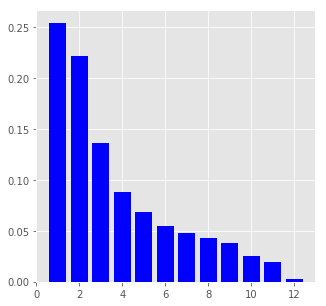

In [6]:
kw=12
pcaWineCols = ['pc'+str(i+1) for i in range(0,kw)]

wineTrainX = scalerWine.transform(wineTrainPD.loc[:,features].values)

pcaStdWineModel = PCA(n_components=kw).fit(wineTrainX)
pcaStdWineMatrix = pd.DataFrame(pcaStdWineModel.components_.transpose(),columns=pcaWineCols)

print('PCA Transformation Matrix:\n')
display(pcaStdWineMatrix)
plt.figure(figsize=(5,5))
screePlot(plt,pcaStdWineModel.explained_variance_ratio_)

**Biplot** 
___
Ploting the transformed dataset and the projection of the canonical base taking only 2 components in to two dimension space.

In [7]:
stdRedWineTrainX = scalerWine.transform(redWineTrain.values)
stdWhiteWineTrainX = scalerWine.transform(whiteWineTrain.values)
pcaStdRedWineTrainPD = pd.DataFrame(pcaStdWineModel.transform(stdRedWineTrainX),\
                                    columns=pcaWineCols)
pcaStdWhiteWineTrainPD = pd.DataFrame(pcaStdWineModel.transform(stdWhiteWineTrainX),\
                                      columns=pcaWineCols)

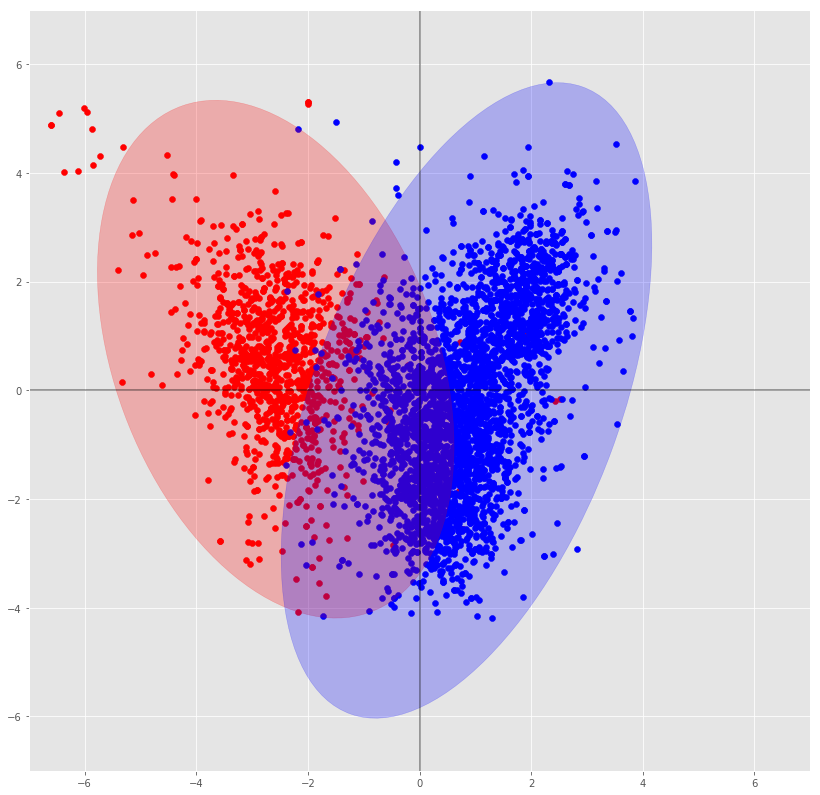

In [8]:
cols = ['pc1','pc2']
alpha=0.03
df=2
plt.figure(figsize=(14,14))
plt.axis([-7,7,-7,7])

getProbabilityDensityContour(plt,pcaStdRedWineTrainPD,cols,alpha,df,color='Red')
scatterPlot(plt,pcaStdRedWineTrainPD,'pc1','pc2','Red',color='Black',alpha=0.25)

getProbabilityDensityContour(plt,pcaStdWhiteWineTrainPD,cols,alpha,df,color='Blue')
scatterPlot(plt,pcaStdWhiteWineTrainPD,'pc1','pc2','Blue',color='Black',alpha=0.25)

plt.show()

Applying the pca to the validation dataset

In [9]:
stdRedWineTestX = scalerWine.transform(redWineTest.values)
stdWhiteWineTestX = scalerWine.transform(whiteWineTest.values)
pcaStdRedWineTestPD = pd.DataFrame(pcaStdWineModel.transform(stdRedWineTestX),\
                                   columns=pcaWineCols)
pcaStdWhiteWineTestPD = pd.DataFrame(pcaStdWineModel.transform(stdWhiteWineTestX),\
                                     columns=pcaWineCols)

Visualizing the set of validation data without labels, it is clear that there are two groups, however there are samples that are scattered and it is not clear to what type of population it belongs

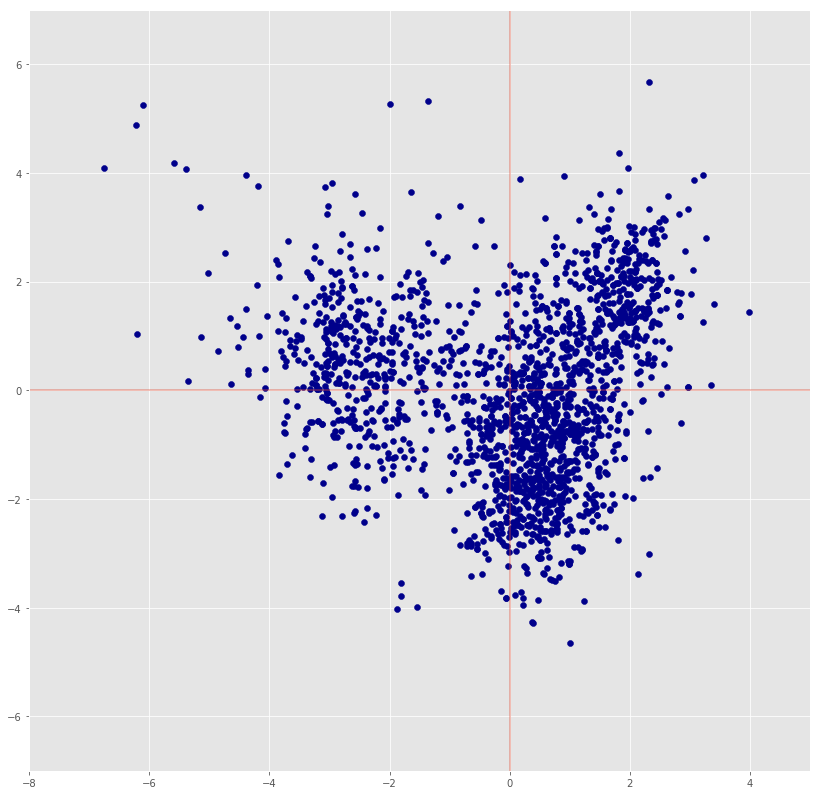

In [10]:
cols = ['pc1','pc2']
alpha=0.03
df=2
plt.figure(figsize=(14,14))
plt.axis([-8,5,-7,7])
scatterPlot(plt,pcaStdRedWineTestPD,'pc1','pc2',alpha=0.25)
scatterPlot(plt,pcaStdWhiteWineTestPD,'pc1','pc2',alpha=0.25)
plt.show()

**Fiting the logistic regression**
___

In [11]:
from sklearn.linear_model import LogisticRegression

pcaStdRedWineTrainPD['target'] = [1]*len(pcaStdRedWineTrainPD)
pcaStdWhiteWineTrainPD['target'] = [0]*len(pcaStdWhiteWineTrainPD)

pcaStdRedWineTestPD['target'] = [1]*len(pcaStdRedWineTestPD)
pcaStdWhiteWineTestPD['target'] = [0]*len(pcaStdWhiteWineTestPD)

trainPD = pd.concat([pcaStdRedWineTrainPD,pcaStdWhiteWineTrainPD])
testPD = pd.concat([pcaStdRedWineTestPD,pcaStdWhiteWineTestPD])

In [12]:
trainX = trainPD.loc[:,pcaWineCols].values
trainY = trainPD[['target']].values

lrModel = LogisticRegression(random_state=1,penalty='l1').fit(trainX,trainY)

trainPD['prob0'] = pd.DataFrame(lrModel.predict_proba(trainX))[0]
trainPD['prob1'] = pd.DataFrame(lrModel.predict_proba(trainX))[1]
trainPD['target_est'] = lrModel.predict(trainX)
trainPD[['target','prob0','prob1','target_est']][:5]

,target,prob0,prob1,target_est
0,1,0.000198,0.999802,1
1,1,0.000039,0.999961,1
2,1,0.000022,0.999978,1
3,1,0.000059,0.999941,1
4,1,0.001243,0.998757,1


In [13]:
testX = testPD.loc[:,pcaWineCols].values
testPD['prob0'] = pd.DataFrame(lrModel.predict_proba(testX))[0]
testPD['prob1'] = pd.DataFrame(lrModel.predict_proba(testX))[1]
testPD['target_est'] = lrModel.predict(testX)
testPD[['target','prob0','prob1','target_est']]

,target,prob0,prob1,target_est
0,1,0.009479,0.990521,1
1,1,0.001392,0.998608,1
2,1,0.110649,0.889351,1
3,1,0.219888,0.780112,1
4,1,0.000302,0.999698,1
5,1,0.000366,0.999634,1
6,1,0.015293,0.984707,1
7,1,0.001740,0.998260,1
8,1,0.001301,0.998699,1
9,1,0.035348,0.964652,1


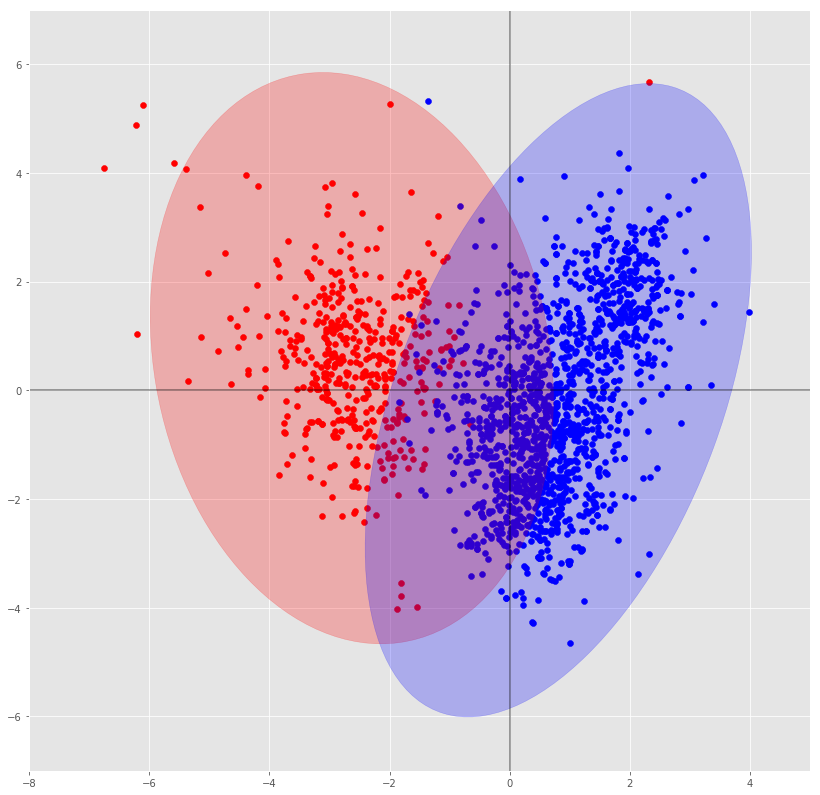

In [14]:
cols = ['pc1','pc2']
alpha=0.03
df=2
plt.figure(figsize=(14,14))
plt.axis([-8,5,-7,7])

inferredTruesTestPD = testPD[testPD['target_est']==1]
inferredFalsesTestPD = testPD[testPD['target_est']==0]

getProbabilityDensityContour(plt,inferredTruesTestPD,cols,alpha,df,color='Red')
scatterPlot(plt,inferredTruesTestPD,'pc1','pc2','Red',color='Black',alpha=0.25)

getProbabilityDensityContour(plt,inferredFalsesTestPD,cols,alpha,df,color='Blue')
scatterPlot(plt,inferredFalsesTestPD,'pc1','pc2','Blue',color='Black',alpha=0.25)

plt.show()

In [15]:
coeficients = list(lrModel.coef_[0][:2])
intercept = list(lrModel.intercept_)

print('coeficients: ',coeficients)
print('intercept: ',intercept)

coeficients:  [-3.3123915290983708, 0.5959073600928048]
intercept:  [-3.542442935389801]


In [16]:
def logisticSurface(coeficients,intercept,vector):
    logitTransformation = np.dot(coeficients,vector)+intercept
    return 1/(1+math.exp(-1*logitTransformation))

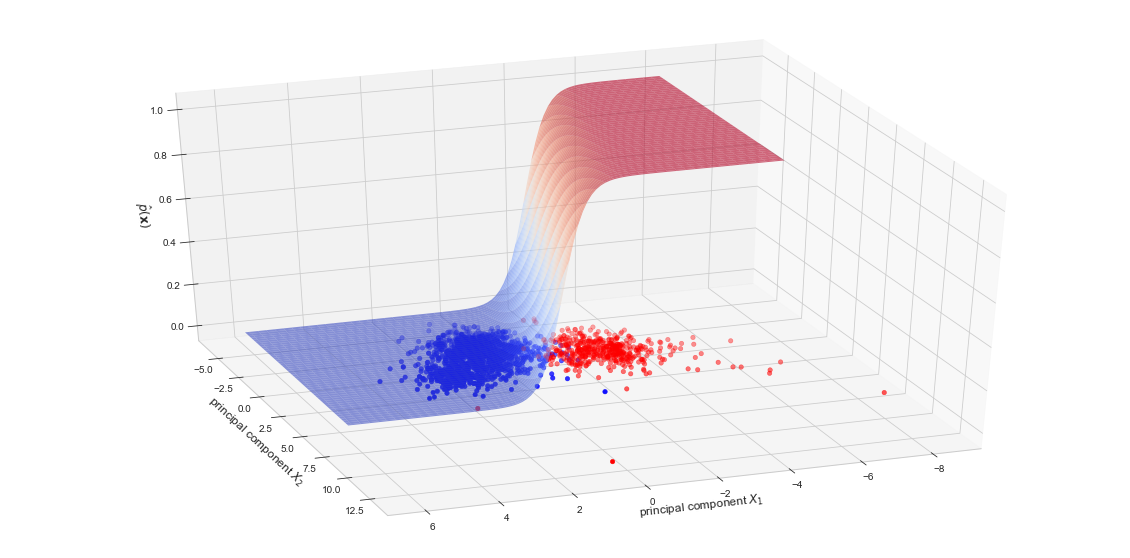

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import math

positivesX1 = list(inferredTruesTestPD['pc1'].values)
positivesX2 = list(inferredTruesTestPD['pc2'].values)
negativesX1 = list(inferredFalsesTestPD['pc1'].values)
negativesX2 = list(inferredFalsesTestPD['pc2'].values)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positivesX1, positivesX2, 0, color="Red", marker='o')
ax.scatter(negativesX1, negativesX2, 0, color="Blue", marker='o')
ax.set_xlabel('principal component $X_1$')
ax.set_ylabel('principal component $X_2$')
ax.set_zlabel('$\hat{p}(\mathbf{x})$')
x1 = np.linspace(-6,6,100)
x2 = np.linspace(-6,6,100)
X1, X2 = np.meshgrid(x1,x2)
Z = np.array([[logisticSurface(coeficients,intercept,[x1,x2])
               for x1 in x1] for x2 in x2])
ax.plot_surface(X1,X2,Z,cmap='coolwarm',alpha=0.6,linewidth=0)
ax.view_init(35,70)
plt.show()

# Logistic regression significance metrics

### Wald test for goodness of fit
___
Consider the MLE $\hat{\beta_j}$, by the asymptotic distribution theorem for the MLE, whe have that:

$$
\frac{\hat{\beta_j}-B_0}{\sqrt{V(\hat{\beta_j}})} \sim N(0,1)
\implies \frac{(\hat{\beta_j}-B_0)^2}{V(\hat{\beta_j})} \sim \chi_{(1)}^2
$$

Where $B_0$ is a fixed expected value to contrast, usually $B_0 = 0$ to test significance. Its possible to obtain the variance of the MLE vector $(\hat{\beta}_0,\hat{\beta}_1,...,\hat{\beta}_p)$ computing the Fisher information. $\mathbf{I(\beta)}=-E\left[ \nabla^2 ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) \right]$, computing the partial derivates of second order:

$$
\begin{align*}
\frac{\partial^2}{\partial \beta_j \partial \beta_k} \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= -\sum_{i=1}^n x_{ij}x_{ik} \frac{e^{\sum_{l=0}^{p} \beta_l x_{il}}}{\left(1+e^{\sum_{l=0}^{p} \beta_l x_{il}}\right)^2} = -\sum_{i=1}^n x_{ij}x_{ik} p(\mathbf{x_i})(1-p(\mathbf{x_i}))\\
\nabla^2 ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= 
\begin{bmatrix}
    1  & \dots & 1 \\
    x_{11} & \dots & x_{1n} \\
    \vdots & \ddots  & \vdots\\
    x_{1p} & \dots & x_{pn}
\end{bmatrix}
\begin{bmatrix}
    p(\mathbf{x_1})(1-p(\mathbf{x_1})) & 0 & \dots  & 0 \\
    0 & p(\mathbf{x_2})(1-p(\mathbf{x_2})) & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots  \\
    0 & 0  & \dots  & p(\mathbf{x_n})(1-p(\mathbf{x_n})) \\
\end{bmatrix}
\begin{bmatrix}
    1 & x_{11} & \dots & x_{1p} \\
    \vdots & \vdots & \ddots & \vdots\\
    1 & x_{n1} & \dots & x_{np}
\end{bmatrix}\\
\nabla^2 ln \mathcal{L}(\beta_0,\beta_1,...,\beta_p) &= \mathbf{X'}diag\left(p(\mathbf{x_1})(1-p(\mathbf{x_1})),\dots,p(\mathbf{x_n})(1-p(\mathbf{x_n}))\right)\mathbf{X'}\\
\mathbf{Cov(\beta)} & = \left[\mathbf{X'}diag\left(p(\mathbf{x_1})(1-p(\mathbf{x_1})),\dots,p(\mathbf{x_n})(1-p(\mathbf{x_n}))\right)\mathbf{X'}\right]^{-1} \\
\implies V(\hat{\beta_j}) &= \left[\mathbf{X'}diag\left(p(\mathbf{x_1})(1-p(\mathbf{x_1})),\dots,p(\mathbf{x_n})(1-p(\mathbf{x_n}))\right)\mathbf{X'}\right]^{-1}_{jj}\\ 
\end{align*}
$$

Considere the follwing hypotesis testing for the vector of MLE betas $\mathbf{\hat{\beta}}=(\hat{\beta_0},...,\hat{\beta_p})$, with alternative hypotesis $H_a: \mathbf{\hat{\beta}=0}$ versus $H_a: \mathbf{\hat{\beta} \neq 0}$ to contrast the significance of the coeficients. The statistic:

$$\chi^2 = \sum_{j=0}^{p} \frac{\beta_j^2}{V(\hat{\beta_j})} \sim \chi_{(p)}^2$$

For some confidence $(1-\alpha)100$% and the chisquared critical value asociated $\chi_{(1-\alpha)}^2$ dont reject when $\chi^2 \leq \chi_{(1-\alpha)}^2$

In [18]:
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm

sm_model = sm.Logit(trainY, sm.add_constant(trainX)).fit(disp=0)
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4534
Method:                           MLE   Df Model:                           12
Date:                Sun, 24 Mar 2019   Pseudo R-squ.:                  0.9482
Time:                        17:45:58   Log-Likelihood:                -131.53
converged:                       True   LL-Null:                       -2537.3
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7497      0.267    -14.028      0.000      -4.274      -3.226
x1            -3.5386      0.219    -16.134      0.000      -3.968      -3.109
x2             0.5950      0.136      4.385      0.000       0.329       0.861
x3             0.3186      0.163      1.950      0.051      -0.002       0.639
x4             0.9571      0.184      5.190      0.000       0.596       1.319
x5            -0.6544      0.227     -2.882      0.004      -1.099      -0.209
x6             0.4942      0.203      2.436      0.015       0.097       0.892
x7            -0.6554      0.205     -3.200      0.001      -1.057      -0.254
x8            -1.1167      0.250     -4.464      0.000      -1.607      -0.626
x9            -1.0417      0.269     -3.875      0.000      -1.569      -0.515
x10            1.2396      0.368      3.364      0.001       0.517       1.962
x11           -2.3563      0.396     -5.953      0.000      -3.132      -1.580
x12           -8.8491      1.137     -7.785      0.000     -11.077      -6.621
==============================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""